<h1 align = center>Data Preparation with Pytorch</h1>

<h1>Table of Contents</h1>

<div font = 3>

1. <a href = #obj>Objective</a>
2. <a href = #lib>Import Libraries and Auxiliary Function</a>
3. <a href = #data>Download Data</a>
4. <a href = #examine>Examine Data</a>
4. <a href = #q1>Question 1: Find number of files</a>
5. <a href = #label>Assign Labels to Images</a>
6. <a href = #q2>Question 2: Assign Labels to image</a>
7. <a href = #split>Training and Validation Split</a>
8. <a href = #q3>Question 3: Training and Validation Split</a>
9. <a href = #dataset>Create a Dataset Class</a>
10. <a href = #q4> Question 4: Display training dataset object</a>
11. <a href = #q5>Question 5: Display validation dataset object</a>

</div>

<br>

<hr>

<h2 id = obj>Objectives</h2>

<ul><li> How to create a dataset object.</li></ul> 

Crack detection has vital importance for structural health monitoring and inspection. We would like to train a network to detect Cracks, we will denote the images that contain cracks as positive and images with no cracks as negative.  In this lab you are going to have to build a dataset object. There are five questions in this lab, Including some questions that are intermediate steps to help you build the dataset object. You are going to have to remember the output for some  of the questions. 


<h2 id = lib>Import Libraries and Auxiliary Functions</h2>

The following are the libraries we are going to use for this lab:

In [1]:
import pandas as pd

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import matplotlib.pyplot as plt

import os
import zipfile
import glob

from typing import Tuple,List,Dict,Union, Any

We will use this function in the lab to plot:

In [2]:
def show_data(data_sample, shape:Tuple[int] = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

<h2 id = data>Download Data</h2>

In [3]:
# For downloading the dataset of images
try:
    # Check if the directory exists and create the direction
    os.mkdir(os.getcwd()+'/..'+'/images')
    # If the path of the images doesn't exists it downloads the images
    if not os.path.exists(os.path.join(os.getcwd(),'..','images','Negative')):
        with zipfile.ZipFile('concrete_crack_images_for_classification.zip', 'r') as f:
            f.extractall(os.path.abspath(os.getcwd())+'\..'+'\images')
except:
    pass

<h2 id=examine>Examine Files </h2>

In this section we are going to get a list of the negative image files, then plot them. Then for the first question your job to do something similar to the positive files.

In [18]:
# Get the path of the folder
negative_file_path = os.path.join(os.getcwd(),'images','Negative')

# List comprehension to get all the directories
negative_files = [os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()           # Sort the values to order them by number

negative_files[0:3]

['c:\\Users\\DELL\\PythonProjects\\AICapstone\\images\\Negative\\00001.jpg',
 'c:\\Users\\DELL\\PythonProjects\\AICapstone\\images\\Negative\\00002.jpg',
 'c:\\Users\\DELL\\PythonProjects\\AICapstone\\images\\Negative\\00003.jpg']

We can obtain the list that contains the path to the positive files files as follows:

In [19]:
# Get the path of the folder
positive_file_path = os.path.join(os.getcwd(),'images','Positive')

# List comprehension to get all the directories
positive_files = [os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()           # Sort the values to order them by number

positive_files[0:3]

['c:\\Users\\DELL\\PythonProjects\\AICapstone\\images\\Positive\\00001.jpg',
 'c:\\Users\\DELL\\PythonProjects\\AICapstone\\images\\Positive\\00002.jpg',
 'c:\\Users\\DELL\\PythonProjects\\AICapstone\\images\\Positive\\00003.jpg']

<h2 id = q1>Question 1</h2>
<b>Find the combined length of the list <code>positive_files</code> and <code>negative_files</code> using the function <code>len</code> . Then assign  it to the variable <code>number_of_samples</code></b>

In [20]:
number_of_samples = len(positive_files) + len(negative_files)

print(f'The number of samples in this projects is : {number_of_samples:0,}')

The number of samples in this projects is : 40,000


<h2 id = label>Assign Labels to Images</h2>

In this section we will assign a label to each image in this case we  can assign the positive images, i.e images with a crack to a value one  and the negative images i.e images with out a crack to a value of zero <b>Y</b>. First we create a tensor or vector of zeros, each element corresponds to a new sample. The length of the tensor is equal to the number of samples.

In [21]:
Y = torch.zeros([number_of_samples],dtype = torch.int64)
Y.size()

torch.Size([40000])

As we are using the tensor <b>Y</b> for classification we cast it to a <code>LongTensor</code>. 

In [22]:
Y = Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

With respect to each element we will set the even elements to class one and the odd elements to class zero.

<b>Remember: </b> to use step in slicing is <code>Y[start,stop,step]</code>

In [23]:
Y[::2] = 1
Y[1::2] = 0

<h2 id = q2>Question 2</h2>

<b>Create a list all_files such that the even indexes contain the path to images with positive or cracked samples and the odd element contain the negative images or images with out cracks. Then use the following code to print out the first four samples.</b>


In [24]:
all_files = [positive_files[int((i+1)/2)] if (type_file == 1) 
             else negative_files[int((i)/2)] 
             for i,type_file in enumerate(Y)]

In [25]:
all_files[-1]

'c:\\Users\\DELL\\PythonProjects\\AICapstone\\images\\Negative\\20000.jpg'

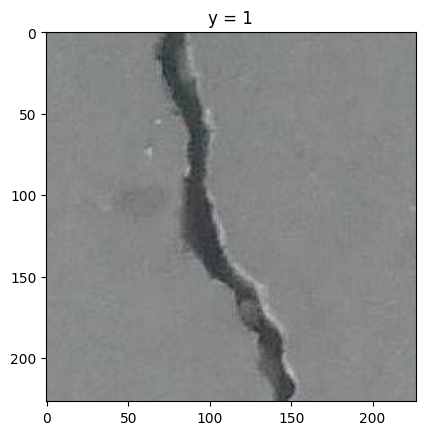

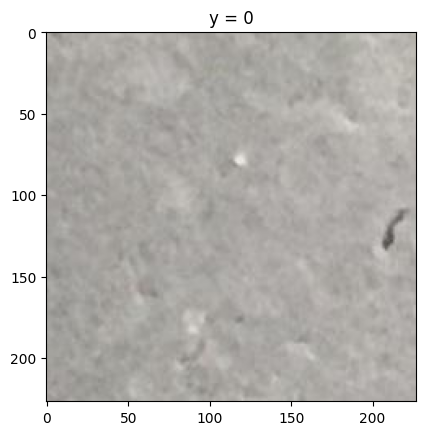

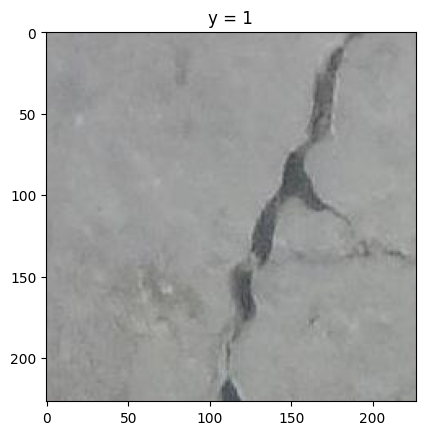

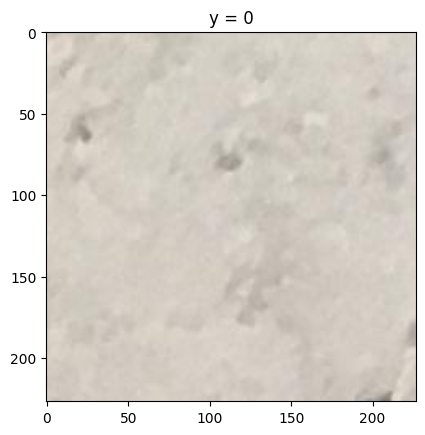

In [26]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y = "+str(y.item()))
    plt.show()
    

<h2 id = split>Training  and Validation  Split  </h2>

When training the model we  split up our data into training and validation data. It If the variable train is set to <code>True</code>  the following lines of code will segment the  tensor <b>Y</b> such at  the first 30000 samples are used for training. If the variable train is set to <code>False</code> the remainder of the samples will be used for validation data. 

In [13]:
train=False

if train:
    all_files = all_files[0:30000]
    Y=Y[0:30000]
else:
    all_files = all_files[30000:]
    Y=Y[30000:]

<h2 id = q3>Question 3</h2>

Modify the above lines of code such that if the variable <code>train</code> is set to <c>True</c> the first 30000 samples of all_files are use in training. If <code>train</code> is set to <code>False</code> the remaining  samples are used for validation. In both cases reassign  the values to the variable all_files, then use the following lines of code to print out the first four validation sample images.

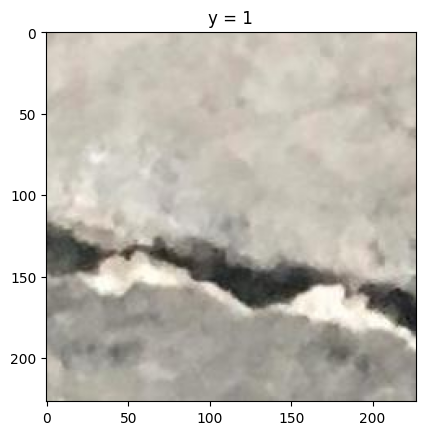

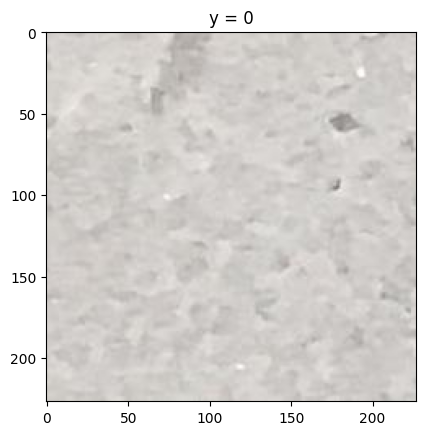

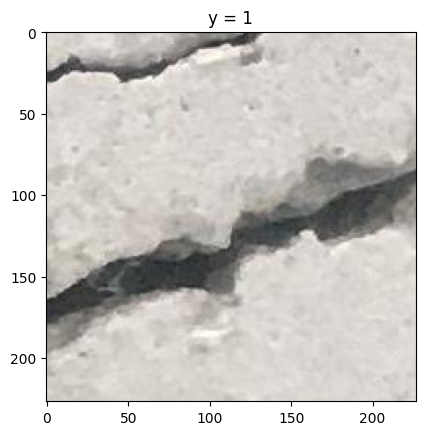

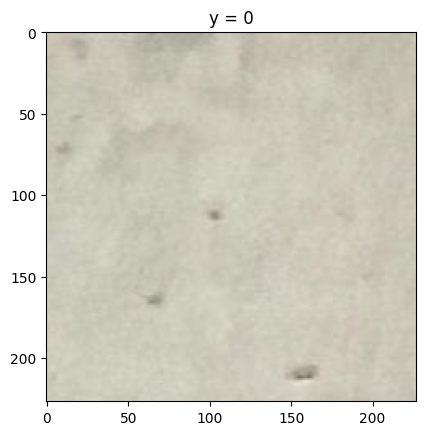

In [27]:
train = False

if train:
    all_files = all_files[:30_000]
    Y = Y[:30_000]
else:
    all_files = all_files[30_000:]
    Y = Y[30_000:]

for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y = "+str(y.item()))
    plt.show()

Just a note the images printed out in question two are the first four training samples.

<h2 id = dataset>Create a Dataset Class</h2>

In this section, we will use the previous code to build a dataset class. 

Complete the code to build a Dataset class <code>dataset</code>. As before, make sure the even samples are positive, and the odd samples are negative.  If the parameter <code>train</code> is set to <code>True</code>, use the first 30 000  samples as training data; otherwise, the remaining samples will be used as validation data.  

In [41]:
class Data(Dataset):
    def __init__(self,transform = None, train:bool = True):
        directory = os.path.join(os.getcwd(),'images')
        positive = 'Positive'
        negative = 'Negative'

        # Paths and files
        positive_path = os.path.join(directory, positive)
        negative_path = os.path.join(directory, negative)
        positive_files = [os.path.join(positive_path,file) for file in  os.listdir(positive_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_path,file) for file in  os.listdir(negative_path) if file.endswith(".jpg")]
        negative_files.sort()

        self.number_of_samples = len(positive_files) + len(negative_files)

        # Atrributes
        self.all_files = [None]*number_of_samples
        self.all_files[::2] = positive_files
        self.all_files[1::2] = negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y = torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2] = 1
        self.Y[1::2] = 0

        # Conditional for training
        if train == True:
            self.Y = self.Y[0:30000]
            self.all_files = self.all_files[0:30000]
            self.len = len(self.all_files)
        elif train == False:
            self.Y[30_000:]
            self.all_files = self.all_files[30_000:]
            self.len = len(self.all_files)
    
    # Get the length
    def __len__(self):
        return self.len
    
     # Getter
    def __getitem__(self, idx:int):
        image = Image.open(self.all_files[idx])
        y = self.Y[idx]
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)
        return image, y

<h2 id = q4>Question 4</h2>

<b>Create a Dataset object <code>dataset</code> for the training data, use the following lines of code to print out sample the 10th and  sample 100 (remember zero indexing)  </b>

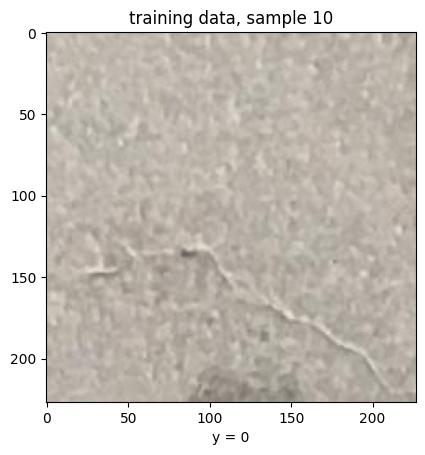

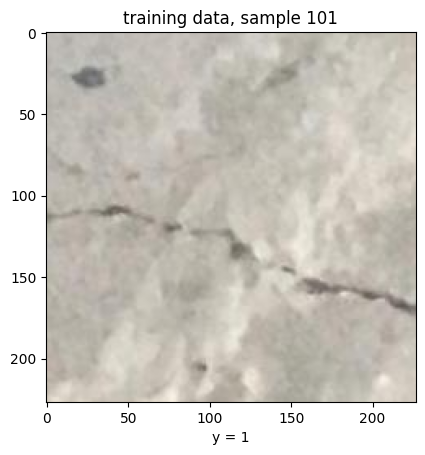

In [44]:
data = Data(train = True)

samples = [10,101]

for sample in samples:
    plt.imshow(data[sample-1][0])
    plt.xlabel("y = "+ str(data[sample-1][1].item()))
    plt.title("training data, sample {}".format(int(sample)))
    plt.show()

In [45]:
len(data.all_files)

30000

<h2 id = q5>Question 5</h2>
Create a Dataset object <code>dataset</code> for the validation  data, use the following lines of code to print out the 16 th and  sample 103 (remember zero indexing) 

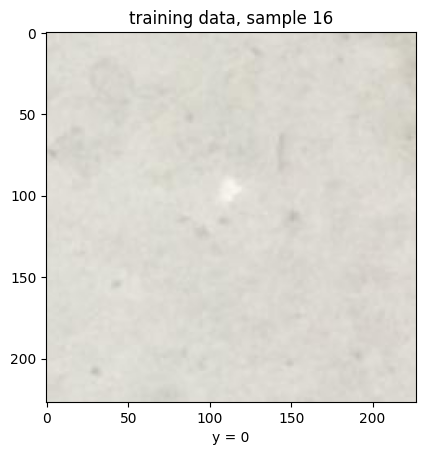

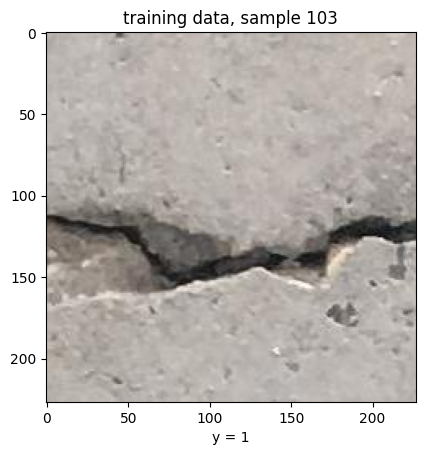

In [43]:
data = Data(train = False)

samples = [16,103]

for sample in samples:
    plt.imshow(data[sample-1][0])
    plt.xlabel("y = "+ str(data[sample-1][1].item()))
    plt.title("training data, sample {}".format(int(sample)))
    plt.show()